In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
import tensorflow as tf

In [3]:
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 2.4.1
Eager execution: True


In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
#x_train = np.reshape(x_train, (-1, 784))
#x_test = np.reshape(x_test, (-1, 784))
#train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))


In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
x_train.shape[0]

60000

In [8]:
def plot_sample(x,y,index):
    plt.figure(figsize = (20,5))
    plt.imshow(x[index])
    plt.xlabel(y[index])

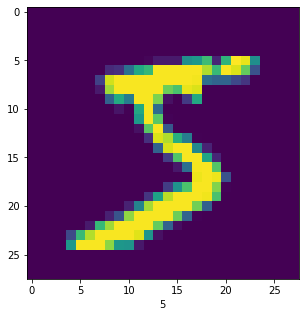

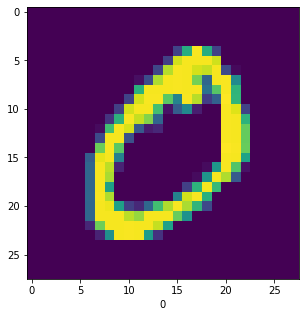

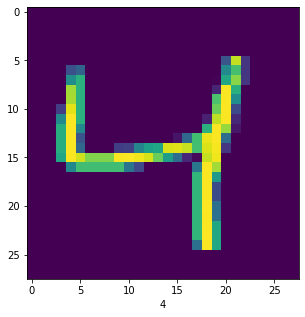

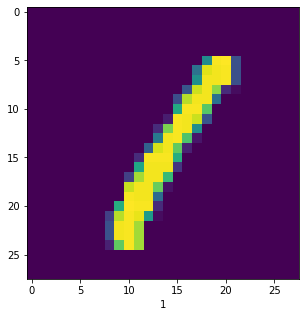

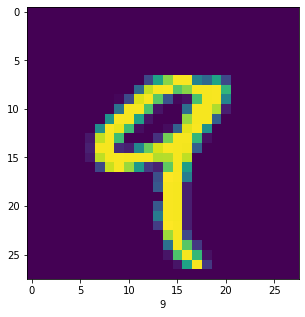

In [9]:
for i in range(5):
    plot_sample(x_train,y_train,i)

In [10]:
'''NORMALIZE'''

x_train = x_train/255
x_test = x_test/255


x_train=x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test=x_test.reshape((x_test.shape[0],28,28,1))

In [11]:
'''MODEL'''
model = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 7744)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                495680    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 515,146
Trainable params: 515,146
Non-trainable params: 0
__________________________________________________

In [22]:
"""JUMP THIS!!!"""
history = model.fit(x_train, y_train, epochs=15,validation_data=(x_test,y_test))

Epoch 1/15
1875/1875 [==============================] - 35s 18ms/step - loss: 1.1072 - accuracy: 0.6312 - val_loss: 0.3177 - val_accuracy: 0.9094
Epoch 2/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3117 - accuracy: 0.9072 - val_loss: 0.2379 - val_accuracy: 0.9294
Epoch 3/15
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2369 - accuracy: 0.9297 - val_loss: 0.1804 - val_accuracy: 0.9452
Epoch 4/15
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1730 - accuracy: 0.9480 - val_loss: 0.1308 - val_accuracy: 0.9615
Epoch 5/15
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1241 - accuracy: 0.9625 - val_loss: 0.1035 - val_accuracy: 0.9682
Epoch 6/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1026 - accuracy: 0.9694 - val_loss: 0.0866 - val_accuracy: 0.9738
Epoch 7/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0821 - accuracy: 0.9748 - val_loss: 0.0726 -

313/313 - 1s - loss: 0.0550 - accuracy: 0.9831


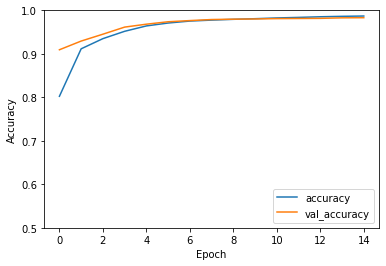

In [23]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

In [14]:
#CRIANDO O OTIMIZADOR
optimizer = keras.optimizers.SGD(learning_rate=1e-3)
#CRIANDO A FUNÇÃO DE PERDA
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Prepare the training dataset.
batch_size = 64
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
#x_train = np.reshape(x_train, (-1, 784))
#x_test = np.reshape(x_test, (-1, 784))

x_train=x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test=x_test.reshape((x_test.shape[0],28,28,1))
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)


In [16]:
'''LEARNING LOOP'''
epochs = 15
for epoch in range(epochs):
    print("\nStart of epoch %d" % (epoch,))

    # Iterate over the batches of the dataset.
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):

        # Open a GradientTape to record the operations run
        # during the forward pass, which enables auto-differentiation.
        with tf.GradientTape() as tape:

            # Run the forward pass of the layer.
            # The operations that the layer applies
            # to its inputs are going to be recorded
            # on the GradientTape.
            logits = model(x_batch_train, training=True)  # Logits for this minibatch

            # Compute the loss value for this minibatch.
            loss_value = loss_fn(y_batch_train, logits)

        # Use the gradient tape to automatically retrieve
        # the gradients of the trainable variables with respect to the loss.
        grads = tape.gradient(loss_value, model.trainable_weights)

        # Run one step of gradient descent by updating
        # the value of the variables to minimize the loss.
        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        # Log every 200 batches.
        if step % 200 == 0:
            print("Training loss (for one batch) at step %d: %.4f" %(step, float(loss_value)))
            print("Seen so far: %s samples" % ((step + 1) * 64))


Start of epoch 0
Training loss (for one batch) at step 0: 0.1925
Seen so far: 64 samples
Training loss (for one batch) at step 200: 0.1581
Seen so far: 12864 samples
Training loss (for one batch) at step 400: 0.3627
Seen so far: 25664 samples
Training loss (for one batch) at step 600: 0.1984
Seen so far: 38464 samples
Training loss (for one batch) at step 800: 0.3289
Seen so far: 51264 samples

Start of epoch 1
Training loss (for one batch) at step 0: 0.0614
Seen so far: 64 samples
Training loss (for one batch) at step 200: 0.1534
Seen so far: 12864 samples
Training loss (for one batch) at step 400: 0.3740
Seen so far: 25664 samples
Training loss (for one batch) at step 600: 0.0536
Seen so far: 38464 samples
Training loss (for one batch) at step 800: 0.0778
Seen so far: 51264 samples

Start of epoch 2
Training loss (for one batch) at step 0: 0.2326
Seen so far: 64 samples
Training loss (for one batch) at step 200: 0.1018
Seen so far: 12864 samples
Training loss (for one batch) at step

In [15]:
test_accuracy = tf.keras.metrics.Accuracy()
logits = model(x_test, training=False)
prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
test_accuracy(prediction, y_test)
print("Test set accuracy: {:.3%}".format(test_accuracy.result()))


Test set accuracy: 98.440%


In [16]:
tf.stack([y_test,prediction],axis=1)

<tf.Tensor: shape=(10000, 2), dtype=int32, numpy=
array([[7, 7],
       [2, 2],
       [1, 1],
       ...,
       [4, 4],
       [5, 5],
       [6, 6]])>

In [17]:
weight = model.get_weights()
np.savetxt('weight.csv' , weight , fmt='%s', delimiter=',')

C:\Users\mateu\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
